<a href="https://colab.research.google.com/github/Shaddynetwork/PORTFOLIO-REBALANCING/blob/main/CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten


In [4]:
import yfinance as yf
import pandas as pd

# List of tickers (10 ETFs and 10 equities from the Japanese market)
tickers = ['DXJ', 'EWJ', 'JPXN', 'DBJP', 'HEWJ', '7203.T', '9984.T', '6758.T', '6701.T', '6861.T', '6752.T', '6976.T', '6594.T', '6367.T', '6301.T', '6098.T', '6305.T', '6326.T', '6762.T', '6841.T']

# Download historical data (adjust the period as needed)
start_date = '1998-01-01'
end_date = '2023-03-31'

# Create a list of DataFrames for each ticker
dfs = []
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
    data.columns = [f"{ticker}_{col}" for col in data.columns]
    dfs.append(data)

# Combine the DataFrames into a single DataFrame
portfolio_data = pd.concat(dfs, axis=1)
portfolio_data.insert(0, 'Date', portfolio_data.index)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

##### ETF and Equity - Japan

In [5]:
portfolio_data

,Date,DXJ_Open,DXJ_High,DXJ_Low,DXJ_Close,DXJ_Volume,EWJ_Open,EWJ_High,EWJ_Low,EWJ_Close,...,6762.T_Open,6762.T_High,6762.T_Low,6762.T_Close,6762.T_Volume,6841.T_Open,6841.T_High,6841.T_Low,6841.T_Close,6841.T_Volume
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-02,1998-01-02,NaN,NaN,NaN,NaN,NaN,27.306944,27.306944,27.135202,27.135202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-05,1998-01-05,NaN,NaN,NaN,NaN,NaN,26.619976,27.135202,26.276493,26.448235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-06,1998-01-06,NaN,NaN,NaN,NaN,NaN,26.104751,26.448235,25.933009,26.448235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-07,1998-01-07,NaN,NaN,NaN,NaN,NaN,26.963458,27.306942,26.619975,27.306942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-08,1998-01-08,NaN,NaN,NaN,NaN,NaN,26.963454,26.963454,26.791712,26.791712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,2023-03-24,65.081733,65.533350,64.812675,65.504524,99100.0,55.817231,55.964142,55.591961,55.954350,...,4557.879200,4572.441114,4509.339485,4528.755371,1485900.0,1998.955085,2013.653284,1985.236766,2009.733765,714100.0
2023-03-27,2023-03-27,66.188228,66.585846,66.062158,66.488861,439600.0,56.032700,56.257966,55.973937,56.199203,...,4553.025228,4553.025228,4509.339485,4528.755371,1187200.0,2033.250941,2035.210701,2004.834422,2029.331421,741900.0
2023-03-28,2023-03-28,66.207620,66.498560,66.120342,66.275505,120300.0,56.287349,56.355908,56.199201,56.306938,...,4538.462989,4567.586816,4514.193133,4553.024902,1031700.0,2046.969124,2060.687442,2044.029484,2057.747803,588100.0


In [6]:
portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6558 entries, 1998-01-02 to 2023-03-30
Columns: 101 entries, Date to 6841.T_Volume
dtypes: datetime64[ns](1), float64(100)
memory usage: 5.1 MB


In [7]:
portfolio_data.describe()

,Date,DXJ_Open,DXJ_High,DXJ_Low,DXJ_Close,DXJ_Volume,EWJ_Open,EWJ_High,EWJ_Low,EWJ_Close,...,6762.T_Open,6762.T_High,6762.T_Low,6762.T_Close,6762.T_Volume,6841.T_Open,6841.T_High,6841.T_Low,6841.T_Close,6841.T_Volume
count,6558,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,6352.000000,6352.000000,6352.000000,6352.000000,...,5816.000000,5816.000000,5816.000000,5816.000000,5.816000e+03,5816.000000,5816.000000,5816.000000,5816.000000,5.816000e+03
mean,2010-08-21 16:42:22.726440960,36.847458,37.016845,36.674613,36.859809,1.924938e+06,39.310973,39.517798,39.092389,39.319215,...,2152.232362,2178.536808,2124.691266,2151.077937,3.375717e+06,1171.598903,1185.058493,1157.240153,1171.254803,1.336327e+06
min,1998-01-02 00:00:00,17.864205,17.864205,17.593256,17.710257,0.000000e+00,18.790613,18.941901,18.730103,18.881382,...,655.785540,670.977465,644.133378,655.785522,0.000000e+00,259.152516,259.972569,259.152466,259.152466,0.000000e+00
25%,2004-05-03 06:00:00,26.162738,26.281730,26.042547,26.151306,3.217500e+04,30.842239,31.021863,30.641512,30.852666,...,1344.971555,1368.452171,1325.809214,1347.450806,1.941900e+06,721.502790,732.894714,707.721299,721.445847,7.868250e+05
50%,2010-08-21 12:00:00,34.080154,34.217536,33.947392,34.104136,5.127500e+05,38.832283,39.047263,38.576922,38.839935,...,1907.831747,1931.862982,1881.820594,1906.941528,2.863650e+06,1104.717420,1116.707020,1090.397329,1102.013550,1.152300e+06
75%,2016-12-08 18:00:00,44.256124,44.502049,44.117737,44.295444,2.954000e+06,45.323250,45.481117,45.124716,45.366436,...,2640.374467,2669.368592,2607.696388,2636.977539,4.149000e+06,1576.607254,1590.662334,1557.844628,1573.796875,1.654825e+06
max,2023-03-30 00:00:00,70.376284,70.472372,69.867002,70.203316,2.920030e+07,70.555661,70.804016,70.278619,70.804016,...,5630.981867,5699.728557,5540.361147,5690.354004,5.686080e+07,2686.831145,2686.831145,2539.849135,2544.748535,1.001490e+07
std,NaN,12.000221,12.043454,11.964808,12.008981,2.900152e+06,10.978800,10.987657,10.977308,10.985527,...,1031.972705,1042.350092,1019.729844,1031.072950,2.366915e+06,518.517248,522.379696,513.878141,518.260469,8.733401e+05


In [12]:
portfolio_data.columns

Index(['Date', 'DXJ_Open', 'DXJ_High', 'DXJ_Low', 'DXJ_Close', 'DXJ_Volume',
       'EWJ_Open', 'EWJ_High', 'EWJ_Low', 'EWJ_Close',
       ...
       '6762.T_Open', '6762.T_High', '6762.T_Low', '6762.T_Close',
       '6762.T_Volume', '6841.T_Open', '6841.T_High', '6841.T_Low',
       '6841.T_Close', '6841.T_Volume'],
      dtype='object', length=101)

In [13]:
portfolio_data.dropna()

,Date,DXJ_Open,DXJ_High,DXJ_Low,DXJ_Close,DXJ_Volume,EWJ_Open,EWJ_High,EWJ_Low,EWJ_Close,...,6762.T_Open,6762.T_High,6762.T_Low,6762.T_Close,6762.T_Volume,6841.T_Open,6841.T_High,6841.T_Low,6841.T_Close,6841.T_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-16,2014-10-16,31.517634,32.243911,31.435415,32.093174,12347000.0,36.899528,37.621027,36.865170,37.414886,...,1507.001378,1535.275360,1507.001378,1529.620605,4452900.0,1056.421533,1077.981156,1052.971993,1074.531616,2258200.0
2014-10-17,2014-10-17,32.045200,32.476855,32.004089,32.428894,7396900.0,37.449234,37.655378,37.243093,37.586662,...,1555.067189,1569.204129,1529.620635,1535.275391,5014200.0,1081.430615,1096.953542,1073.669151,1075.393921,2240700.0
2014-10-20,2014-10-20,32.805745,33.086663,32.798892,32.963333,5259100.0,38.067669,38.445596,38.067669,38.342525,...,1594.650772,1628.579512,1586.168587,1617.269897,5063700.0,1101.265351,1138.347896,1101.265351,1135.760742,2237600.0
2014-10-21,2014-10-21,32.730377,33.011295,32.627601,32.963333,4377400.0,37.998951,38.342520,37.998951,38.273808,...,1631.406956,1634.234282,1557.894616,1560.722046,4269000.0,1143.521971,1160.769662,1115.925664,1118.512817,2512000.0
2014-10-22,2014-10-22,33.244261,33.388145,32.929085,32.997601,3467400.0,38.514314,38.686101,38.205100,38.308170,...,1611.614868,1617.269623,1586.168318,1611.614868,4373100.0,1140.934932,1163.356934,1134.898239,1163.356934,1770500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,2023-03-24,65.081733,65.533350,64.812675,65.504524,99100.0,55.817231,55.964142,55.591961,55.954350,...,4557.879200,4572.441114,4509.339485,4528.755371,1485900.0,1998.955085,2013.653284,1985.236766,2009.733765,714100.0
2023-03-27,2023-03-27,66.188228,66.585846,66.062158,66.488861,439600.0,56.032700,56.257966,55.973937,56.199203,...,4553.025228,4553.025228,4509.339485,4528.755371,1187200.0,2033.250941,2035.210701,2004.834422,2029.331421,741900.0
2023-03-28,2023-03-28,66.207620,66.498560,66.120342,66.275505,120300.0,56.287349,56.355908,56.199201,56.306938,...,4538.462989,4567.586816,4514.193133,4553.024902,1031700.0,2046.969124,2060.687442,2044.029484,2057.747803,588100.0


In [17]:
close_prices = portfolio_data.filter(regex='_Close$', axis=1)
close_prices = close_prices.dropna()


In [20]:
close_prices


,DXJ_Close,EWJ_Close,JPXN_Close,DBJP_Close,HEWJ_Close,7203.T_Close,9984.T_Close,6758.T_Close,6701.T_Close,6861.T_Close,6752.T_Close,6976.T_Close,6594.T_Close,6367.T_Close,6301.T_Close,6098.T_Close,6305.T_Close,6326.T_Close,6762.T_Close,6841.T_Close
Date,,,,,,,,,,,,,,,,,,,,
2014-10-16,32.093174,37.414886,39.281078,24.268158,13.670458,906.504517,3180.625732,1691.834106,2791.325195,10522.920898,914.241211,894.484131,3022.373779,5418.528809,1749.524536,1022.327087,1550.596558,1272.620972,1529.620605,1074.531616
2014-10-17,32.428894,37.586662,39.314793,24.541546,13.734228,883.683838,3203.143555,1706.488403,2740.573975,10309.103516,905.824158,901.520264,2984.425537,5350.326172,1721.198242,1088.333374,1551.401123,1272.204712,1535.275391,1075.393921
2014-10-20,32.963333,38.342525,40.503078,25.039248,14.018305,929.479309,3391.729492,1772.667969,2918.204346,10765.729492,946.706421,935.822144,3112.152100,5624.931641,1786.423462,1166.619629,1612.524170,1338.439575,1617.269897,1135.760742
2014-10-21,32.963333,38.273808,40.182831,25.053272,14.006710,914.522522,3310.102783,1746.195801,2875.911133,10565.199219,940.694458,919.110901,3100.582764,5464.294922,1745.797485,1155.874634,1565.877563,1279.286499,1560.722046,1118.512817
2014-10-22,32.997601,38.308170,40.359810,25.095320,14.076283,930.404480,3419.407959,1804.812134,2968.955322,10797.139648,962.337769,938.460693,3247.281738,5586.342773,1796.859497,1165.085083,1599.655884,1300.948364,1611.614868,1163.356934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,65.504524,55.954350,59.420017,48.204487,27.088911,1731.177246,4921.960449,11478.145508,4805.041504,61975.574219,1092.667114,4120.097656,6764.548828,22566.494141,3026.797607,3698.477539,2822.555420,1867.473267,4528.755371,2009.733765
2023-03-27,66.488861,56.199203,59.790176,48.811192,27.402418,1736.999634,4907.111328,11334.606445,4883.172363,61736.710938,1108.600952,4100.776855,6673.083008,22664.824219,3060.827637,3673.655518,2851.425537,1870.406372,4528.755371,2029.331421
2023-03-28,66.275505,56.306938,59.965515,48.650032,27.304449,1752.040649,4838.805176,11215.816406,4878.289551,62194.531250,1116.326294,4086.286865,6606.205078,22571.410156,3082.569336,3636.918945,2887.032227,1857.695801,4553.024902,2057.747803


In [21]:
close_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2014-10-16 to 2023-03-30
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DXJ_Close     2014 non-null   float64
 1   EWJ_Close     2014 non-null   float64
 2   JPXN_Close    2014 non-null   float64
 3   DBJP_Close    2014 non-null   float64
 4   HEWJ_Close    2014 non-null   float64
 5   7203.T_Close  2014 non-null   float64
 6   9984.T_Close  2014 non-null   float64
 7   6758.T_Close  2014 non-null   float64
 8   6701.T_Close  2014 non-null   float64
 9   6861.T_Close  2014 non-null   float64
 10  6752.T_Close  2014 non-null   float64
 11  6976.T_Close  2014 non-null   float64
 12  6594.T_Close  2014 non-null   float64
 13  6367.T_Close  2014 non-null   float64
 14  6301.T_Close  2014 non-null   float64
 15  6098.T_Close  2014 non-null   float64
 16  6305.T_Close  2014 non-null   float64
 17  6326.T_Close  2014 non-null   float64
 18  6762.T_Clo

In [23]:
weekly_price_data = close_prices.resample('W').last()
weekly_price_data


,DXJ_Close,EWJ_Close,JPXN_Close,DBJP_Close,HEWJ_Close,7203.T_Close,9984.T_Close,6758.T_Close,6701.T_Close,6861.T_Close,6752.T_Close,6976.T_Close,6594.T_Close,6367.T_Close,6301.T_Close,6098.T_Close,6305.T_Close,6326.T_Close,6762.T_Close,6841.T_Close
Date,,,,,,,,,,,,,,,,,,,,
2014-10-19,32.428894,37.586662,39.314793,24.541546,13.734228,883.683838,3203.143555,1706.488403,2740.573975,10309.103516,905.824158,901.520264,2984.425537,5350.326172,1721.198242,1088.333374,1551.401123,1272.204712,1535.275391,1075.393921
2014-10-26,33.682758,38.686104,40.528358,25.628073,14.325569,948.445251,3462.097412,1783.540283,3028.165039,10925.188477,965.945190,937.581055,3196.839600,5680.571777,1809.904541,1111.358765,1620.566772,1325.942261,1651.198486,1185.779053
2014-11-02,36.875629,41.434662,43.469585,28.516144,15.943069,1001.950439,3724.334717,1958.916138,3265.005371,12679.208008,1046.106812,982.437256,3342.150146,6114.914551,1945.200562,1134.384155,1797.502075,1447.580811,1741.675171,1297.889160
2014-11-09,36.409710,39.751160,41.767216,27.780106,15.664791,1051.137817,3649.744629,2134.764648,3273.463623,12973.962891,1136.288208,1002.666687,3391.666992,6406.571777,2055.523438,1194.250000,1896.425049,1483.405640,1832.151855,1308.238159
2014-11-16,37.423756,40.438305,42.390858,28.705410,16.128592,1074.575684,3820.034668,2270.433350,3061.999268,13529.643555,1159.535278,1211.115601,3464.322266,6390.417480,2016.015991,1125.173950,2000.978149,1466.743164,2049.861084,1324.623169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,69.213585,56.199203,59.731731,50.204708,28.225372,1828.701416,5500.083008,11428.649414,4707.378418,59446.074219,1175.715698,4129.758301,6754.713867,23004.058594,3233.814453,3669.683838,3185.359131,2029.777222,4567.586426,2068.526611
2023-03-12,68.195038,55.611549,59.176495,49.379971,27.725721,1839.860962,5289.226562,11582.086914,4980.835938,59733.968750,1180.061279,4129.758301,6711.439941,23215.464844,3233.814453,3509.830322,3194.982666,2053.731689,4630.688477,2132.218750
2023-03-19,64.216919,54.563564,58.066021,47.484024,26.657841,1733.118042,4841.775391,11512.792969,4848.990234,60223.894531,1117.291992,4013.834961,6321.971680,22227.257812,2993.712646,3455.221924,2835.065674,1887.027954,4402.551758,2025.411987


In [24]:

# Get the first date in the DataFrame
start_date = weekly_price_data.index.min()

# Calculate the end date for the first 6 years
end_date = start_date + pd.DateOffset(years=6)

# Filter the DataFrame to get the first 6 years of data
first_six = weekly_price_data.loc[start_date:end_date]

In [25]:
first_six

,DXJ_Close,EWJ_Close,JPXN_Close,DBJP_Close,HEWJ_Close,7203.T_Close,9984.T_Close,6758.T_Close,6701.T_Close,6861.T_Close,6752.T_Close,6976.T_Close,6594.T_Close,6367.T_Close,6301.T_Close,6098.T_Close,6305.T_Close,6326.T_Close,6762.T_Close,6841.T_Close
Date,,,,,,,,,,,,,,,,,,,,
2014-10-19,32.428894,37.586662,39.314793,24.541546,13.734228,883.683838,3203.143555,1706.488403,2740.573975,10309.103516,905.824158,901.520264,2984.425537,5350.326172,1721.198242,1088.333374,1551.401123,1272.204712,1535.275391,1075.393921
2014-10-26,33.682758,38.686104,40.528358,25.628073,14.325569,948.445251,3462.097412,1783.540283,3028.165039,10925.188477,965.945190,937.581055,3196.839600,5680.571777,1809.904541,1111.358765,1620.566772,1325.942261,1651.198486,1185.779053
2014-11-02,36.875629,41.434662,43.469585,28.516144,15.943069,1001.950439,3724.334717,1958.916138,3265.005371,12679.208008,1046.106812,982.437256,3342.150146,6114.914551,1945.200562,1134.384155,1797.502075,1447.580811,1741.675171,1297.889160
2014-11-09,36.409710,39.751160,41.767216,27.780106,15.664791,1051.137817,3649.744629,2134.764648,3273.463623,12973.962891,1136.288208,1002.666687,3391.666992,6406.571777,2055.523438,1194.250000,1896.425049,1483.405640,1832.151855,1308.238159
2014-11-16,37.423756,40.438305,42.390858,28.705410,16.128592,1074.575684,3820.034668,2270.433350,3061.999268,13529.643555,1159.535278,1211.115601,3464.322266,6390.417480,2016.015991,1125.173950,2000.978149,1466.743164,2049.861084,1324.623169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-20,44.048805,55.974625,59.597866,37.151558,20.982786,1294.458862,6365.961914,8121.803223,5541.304199,45868.875000,879.360413,3008.584229,9173.333984,18568.470703,2130.579590,4225.853027,3340.292236,1741.219849,3568.108154,1600.976196
2020-09-27,43.914597,55.502338,59.021683,37.197472,21.015797,1293.171509,5995.383789,7904.194336,5634.906250,46538.492188,829.014526,3116.201416,9272.138672,18765.955078,2074.070312,4148.216309,3399.291992,1709.544434,3503.008057,1568.092285
2020-10-04,43.673008,55.530682,59.123909,37.206657,20.982786,1268.305298,6366.651855,7588.777832,5700.552734,46656.664062,803.189392,3172.453613,9556.408203,18189.697266,2081.384277,3983.186279,3394.657227,1734.232544,3574.830078,1550.515503


In [26]:
first_six.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 314 entries, 2014-10-19 to 2020-10-18
Freq: W-SUN
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DXJ_Close     313 non-null    float64
 1   EWJ_Close     313 non-null    float64
 2   JPXN_Close    313 non-null    float64
 3   DBJP_Close    313 non-null    float64
 4   HEWJ_Close    313 non-null    float64
 5   7203.T_Close  313 non-null    float64
 6   9984.T_Close  313 non-null    float64
 7   6758.T_Close  313 non-null    float64
 8   6701.T_Close  313 non-null    float64
 9   6861.T_Close  313 non-null    float64
 10  6752.T_Close  313 non-null    float64
 11  6976.T_Close  313 non-null    float64
 12  6594.T_Close  313 non-null    float64
 13  6367.T_Close  313 non-null    float64
 14  6301.T_Close  313 non-null    float64
 15  6098.T_Close  313 non-null    float64
 16  6305.T_Close  313 non-null    float64
 17  6326.T_Close  313 non-null    float64
 18 

In [30]:
import pandas as pd
import numpy as np



# Calculate weekly returns
weekly_price_data_returns = weekly_price_data.pct_change()

# Calculate 52-week rolling volatility
weekly_price_data_rolling_volatility = weekly_price_data_returns.rolling(52).std() * np.sqrt(52)

# Drop the first 51 rows (since we don't have enough data for the first 51 weeks)
weekly_price_data_rolling_volatility = weekly_price_data_rolling_volatility.dropna()
weekly_price_data_rolling_volatility


,DXJ_Close,EWJ_Close,JPXN_Close,DBJP_Close,HEWJ_Close,7203.T_Close,9984.T_Close,6758.T_Close,6701.T_Close,6861.T_Close,6752.T_Close,6976.T_Close,6594.T_Close,6367.T_Close,6301.T_Close,6098.T_Close,6305.T_Close,6326.T_Close,6762.T_Close,6841.T_Close
Date,,,,,,,,,,,,,,,,,,,,
2015-10-18,0.221024,0.180271,0.160104,0.232043,0.230846,0.191841,0.310653,0.399368,0.266037,0.323935,0.318565,0.407858,0.256865,0.310022,0.303242,0.233211,0.350901,0.300120,0.319666,0.341215
2015-10-25,0.221662,0.179626,0.159251,0.231131,0.230248,0.179486,0.301122,0.400020,0.246462,0.321466,0.312991,0.414239,0.258269,0.305859,0.302382,0.233956,0.351436,0.301281,0.321454,0.327180
2015-11-01,0.203070,0.166301,0.142861,0.204392,0.203508,0.171914,0.292716,0.390505,0.246971,0.286697,0.310521,0.412697,0.255152,0.297563,0.292369,0.234793,0.334975,0.287959,0.317724,0.313481
2015-11-08,0.204413,0.160894,0.137125,0.203621,0.204195,0.165523,0.292960,0.383586,0.248672,0.286988,0.300350,0.416048,0.255313,0.295026,0.286171,0.228969,0.331300,0.289305,0.329184,0.321444
2015-11-15,0.203213,0.160212,0.136620,0.201650,0.202738,0.164308,0.291590,0.379817,0.239723,0.286173,0.299912,0.367498,0.257422,0.301369,0.286271,0.221365,0.328030,0.289310,0.309494,0.321262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,0.146006,0.196116,0.195062,0.157346,0.156245,0.250766,0.376749,0.300977,0.221167,0.344090,0.300657,0.399637,0.335642,0.276673,0.277097,0.402171,0.327308,0.280218,0.406203,0.290186
2023-03-12,0.145519,0.191563,0.190329,0.156621,0.155757,0.243816,0.365232,0.301038,0.227416,0.339909,0.299955,0.395701,0.322354,0.276644,0.277156,0.402621,0.327295,0.280237,0.373771,0.291005
2023-03-19,0.142682,0.181060,0.180908,0.141747,0.140884,0.235360,0.360915,0.290596,0.223859,0.332787,0.296622,0.368861,0.309214,0.267543,0.284955,0.374315,0.340791,0.278696,0.369680,0.276086


In [32]:
# Get the current column names
weekly_price_data_rolling_volatility_cols = weekly_price_data_rolling_volatility.columns

# Create a new list of column names with '_Close' replaced by '_Volatility'
new_cols = [col.replace('_Close', '_Volatility') for col in weekly_price_data_rolling_volatility_cols]

# Rename the columns
weekly_price_data_rolling_volatility.columns = new_cols
weekly_price_data_rolling_volatility


,DXJ_Volatility,EWJ_Volatility,JPXN_Volatility,DBJP_Volatility,HEWJ_Volatility,7203.T_Volatility,9984.T_Volatility,6758.T_Volatility,6701.T_Volatility,6861.T_Volatility,6752.T_Volatility,6976.T_Volatility,6594.T_Volatility,6367.T_Volatility,6301.T_Volatility,6098.T_Volatility,6305.T_Volatility,6326.T_Volatility,6762.T_Volatility,6841.T_Volatility
Date,,,,,,,,,,,,,,,,,,,,
2015-10-18,0.221024,0.180271,0.160104,0.232043,0.230846,0.191841,0.310653,0.399368,0.266037,0.323935,0.318565,0.407858,0.256865,0.310022,0.303242,0.233211,0.350901,0.300120,0.319666,0.341215
2015-10-25,0.221662,0.179626,0.159251,0.231131,0.230248,0.179486,0.301122,0.400020,0.246462,0.321466,0.312991,0.414239,0.258269,0.305859,0.302382,0.233956,0.351436,0.301281,0.321454,0.327180
2015-11-01,0.203070,0.166301,0.142861,0.204392,0.203508,0.171914,0.292716,0.390505,0.246971,0.286697,0.310521,0.412697,0.255152,0.297563,0.292369,0.234793,0.334975,0.287959,0.317724,0.313481
2015-11-08,0.204413,0.160894,0.137125,0.203621,0.204195,0.165523,0.292960,0.383586,0.248672,0.286988,0.300350,0.416048,0.255313,0.295026,0.286171,0.228969,0.331300,0.289305,0.329184,0.321444
2015-11-15,0.203213,0.160212,0.136620,0.201650,0.202738,0.164308,0.291590,0.379817,0.239723,0.286173,0.299912,0.367498,0.257422,0.301369,0.286271,0.221365,0.328030,0.289310,0.309494,0.321262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,0.146006,0.196116,0.195062,0.157346,0.156245,0.250766,0.376749,0.300977,0.221167,0.344090,0.300657,0.399637,0.335642,0.276673,0.277097,0.402171,0.327308,0.280218,0.406203,0.290186
2023-03-12,0.145519,0.191563,0.190329,0.156621,0.155757,0.243816,0.365232,0.301038,0.227416,0.339909,0.299955,0.395701,0.322354,0.276644,0.277156,0.402621,0.327295,0.280237,0.373771,0.291005
2023-03-19,0.142682,0.181060,0.180908,0.141747,0.140884,0.235360,0.360915,0.290596,0.223859,0.332787,0.296622,0.368861,0.309214,0.267543,0.284955,0.374315,0.340791,0.278696,0.369680,0.276086


In [33]:
weekly_price_data_rolling_volatility.columns

Index(['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility',
       'DBJP_Volatility', 'HEWJ_Volatility', '7203.T_Volatility',
       '9984.T_Volatility', '6758.T_Volatility', '6701.T_Volatility',
       '6861.T_Volatility', '6752.T_Volatility', '6976.T_Volatility',
       '6594.T_Volatility', '6367.T_Volatility', '6301.T_Volatility',
       '6098.T_Volatility', '6305.T_Volatility', '6326.T_Volatility',
       '6762.T_Volatility', '6841.T_Volatility'],
      dtype='object')

In [34]:
import pandas as pd
from sklearn.cluster import KMeans


weekly_price_data_rolling_volatility = weekly_price_data_rolling_volatility.dropna()  # Drop any rows with missing values

# Create a NumPy array with only the volatility values
X = weekly_price_data_rolling_volatility.values

# Perform K-Means Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster labels for each asset
cluster_labels = kmeans.labels_

# Create a new DataFrame with the cluster labels
weekly_price_data_rolling_volatility['Cluster'] = cluster_labels

# Print the mean volatility for each cluster
for cluster in range(3):
    cluster_volatility = weekly_price_data_rolling_volatility[weekly_price_data_rolling_volatility['Cluster'] == cluster].drop('Cluster', axis=1)
    print(f"Cluster {cluster} mean volatility: {cluster_volatility.mean().mean()}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 mean volatility: 0.30662753919828856
Cluster 1 mean volatility: 0.39930872757352925
Cluster 2 mean volatility: 0.24197867692542435


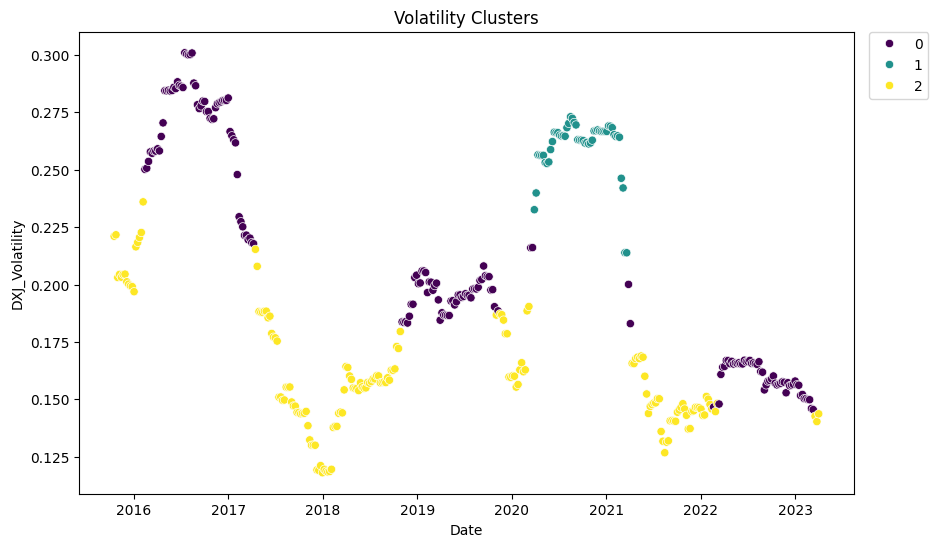

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with cluster assignments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weekly_price_data_rolling_volatility, x=weekly_price_data_rolling_volatility.index, y=weekly_price_data_rolling_volatility.iloc[:, 0], hue=weekly_price_data_rolling_volatility['Cluster'], palette='viridis')
plt.title('Volatility Clusters')
plt.xlabel('Date')
plt.ylabel(weekly_price_data_rolling_volatility.columns[0])  # Update the y-axis label
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


In [56]:
from sklearn.cluster import KMeans

# Assuming your volatility data is in a DataFrame 'volatility_data'
X = weekly_price_data_rolling_volatility.values
print(X)

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_


[[0.22102364 0.18027114 0.16010401 ... 0.31966634 0.34121534 2.        ]
 [0.22166156 0.17962615 0.15925079 ... 0.32145422 0.32717992 2.        ]
 [0.20307034 0.16630057 0.14286147 ... 0.31772379 0.31348069 2.        ]
 ...
 [0.14268154 0.18106019 0.18090762 ... 0.3696799  0.27608614 2.        ]
 [0.1403296  0.18286464 0.18250778 ... 0.34906003 0.26906493 2.        ]
 [0.14369628 0.18317033 0.18276723 ... 0.34924584 0.26755687 2.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
cluster_means = []
for cluster in range(3):
    cluster_volatility = weekly_price_data_rolling_volatility.iloc[labels == cluster]
    cluster_mean = cluster_volatility.mean().mean()
    cluster_means.append(cluster_mean)

# Sort the cluster means to identify low, medium, and high volatility clusters
sorted_cluster_means = sorted(cluster_means)
low_volatility_cluster = cluster_means.index(sorted_cluster_means[0])
medium_volatility_cluster = cluster_means.index(sorted_cluster_means[1])
high_volatility_cluster = cluster_means.index(sorted_cluster_means[2])


## Using Kmeans clustering

In [60]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming your volatility data is in a DataFrame 'volatility_data'
X = weekly_price_data_rolling_volatility.values

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Get the asset names from the column names
asset_names = list(weekly_price_data_rolling_volatility.columns)

# Repeat the cluster labels for each asset
cluster_repeated = np.repeat(labels, len(asset_names))

# Create a DataFrame with asset names and cluster assignments
asset_clusters = pd.DataFrame({'Asset': np.tile(asset_names, len(labels)), 'Cluster': cluster_repeated})

# Calculate the mean volatility for each cluster
cluster_means = []
for cluster in range(3):
    cluster_volatility = weekly_price_data_rolling_volatility[asset_clusters[asset_clusters['Cluster'] == cluster]['Asset']]
    cluster_mean = cluster_volatility.mean().mean()
    cluster_means.append(cluster_mean)

# Sort the cluster means to identify low, medium, and high volatility clusters
sorted_cluster_means = sorted(cluster_means)
low_volatility_cluster = cluster_means.index(sorted_cluster_means[0])
medium_volatility_cluster = cluster_means.index(sorted_cluster_means[1])
high_volatility_cluster = cluster_means.index(sorted_cluster_means[2])

print("Low Volatility Assets:")
print(asset_clusters[asset_clusters['Cluster'] == low_volatility_cluster]['Asset'].unique().tolist())

print("\nMedium Volatility Assets:")
print(asset_clusters[asset_clusters['Cluster'] == medium_volatility_cluster]['Asset'].unique().tolist())

print("\nHigh Volatility Assets:")
print(asset_clusters[asset_clusters['Cluster'] == high_volatility_cluster]['Asset'].unique().tolist())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Low Volatility Assets:
['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility', 'DBJP_Volatility', 'HEWJ_Volatility', '7203.T_Volatility', '9984.T_Volatility', '6758.T_Volatility', '6701.T_Volatility', '6861.T_Volatility', '6752.T_Volatility', '6976.T_Volatility', '6594.T_Volatility', '6367.T_Volatility', '6301.T_Volatility', '6098.T_Volatility', '6305.T_Volatility', '6326.T_Volatility', '6762.T_Volatility', '6841.T_Volatility', 'Cluster']

Medium Volatility Assets:
['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility', 'DBJP_Volatility', 'HEWJ_Volatility', '7203.T_Volatility', '9984.T_Volatility', '6758.T_Volatility', '6701.T_Volatility', '6861.T_Volatility', '6752.T_Volatility', '6976.T_Volatility', '6594.T_Volatility', '6367.T_Volatility', '6301.T_Volatility', '6098.T_Volatility', '6305.T_Volatility', '6326.T_Volatility', '6762.T_Volatility', '6841.T_Volatility', 'Cluster']

High Volatility Assets:
['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility', 'DBJP_Volatility', 'HEWJ_Vola

## Using Heirarchical clustering

In [65]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Assuming your volatility data is in a DataFrame 'volatility_data'
X = weekly_price_data_rolling_volatility.values

# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(X)

# Get the asset names from the column names
asset_names = list(weekly_price_data_rolling_volatility.columns)

# Repeat the cluster labels for each asset
cluster_repeated = np.repeat(labels, len(asset_names))

# Create a DataFrame with asset names and cluster assignments
asset_clusters = pd.DataFrame({'Asset': np.tile(asset_names, len(labels)), 'Cluster': cluster_repeated})

# Print the assets in each cluster
print("Low Volatility Assets:")
print(asset_clusters[asset_clusters['Cluster'] == 0]['Asset'].unique().tolist())

print("\nMedium Volatility Assets:")
print(asset_clusters[asset_clusters['Cluster'] == 1]['Asset'].unique().tolist())

print("\nHigh Volatility Assets:")
print(asset_clusters[asset_clusters['Cluster'] == 2]['Asset'].unique().tolist())

# Visualize the clusters (if possible)
if weekly_price_data_rolling_volatility.shape[1] <= 2:
    plt.scatter(weekly_price_data_rolling_volatility.iloc[:, 0], weekly_price_data_rolling_volatility.iloc[:, 1], c=labels)
    plt.title('Hierarchical Clustering')
    plt.title('Hierarchical Clustering')
    plt.xlabel(weekly_price_data_rolling_volatility.columns[0])
    plt.ylabel(weekly_price_data_rolling_volatility.columns[1])
    plt.show()
else:
    print("Visualization is not possible for more than 2 dimensions.")


Low Volatility Assets:
['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility', 'DBJP_Volatility', 'HEWJ_Volatility', '7203.T_Volatility', '9984.T_Volatility', '6758.T_Volatility', '6701.T_Volatility', '6861.T_Volatility', '6752.T_Volatility', '6976.T_Volatility', '6594.T_Volatility', '6367.T_Volatility', '6301.T_Volatility', '6098.T_Volatility', '6305.T_Volatility', '6326.T_Volatility', '6762.T_Volatility', '6841.T_Volatility', 'Cluster']

Medium Volatility Assets:
['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility', 'DBJP_Volatility', 'HEWJ_Volatility', '7203.T_Volatility', '9984.T_Volatility', '6758.T_Volatility', '6701.T_Volatility', '6861.T_Volatility', '6752.T_Volatility', '6976.T_Volatility', '6594.T_Volatility', '6367.T_Volatility', '6301.T_Volatility', '6098.T_Volatility', '6305.T_Volatility', '6326.T_Volatility', '6762.T_Volatility', '6841.T_Volatility', 'Cluster']

High Volatility Assets:
['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility', 'DBJP_Volatility', 'HEWJ_Vola

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

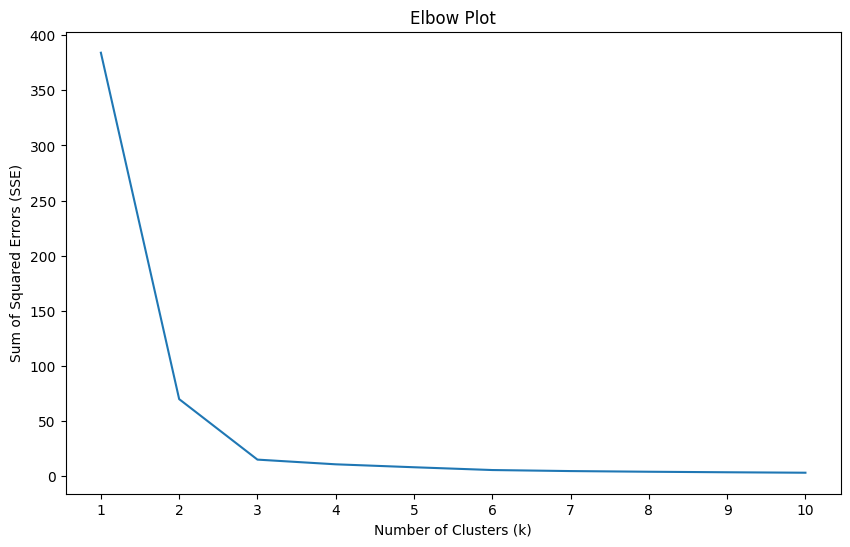

In [66]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Assuming your volatility data is in a DataFrame 'volatility_data'
X = weekly_price_data_rolling_volatility.values

# Define the range of values for k (number of clusters)
k_range = range(1, 11)

# Create an empty list to store the SSE (Sum of Squared Errors) for each value of k
sse = []

# Iterate over the range of k values
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # inertia_ is the SSE for KMeans

# Create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Plot')
plt.xticks(k_range)
plt.show()


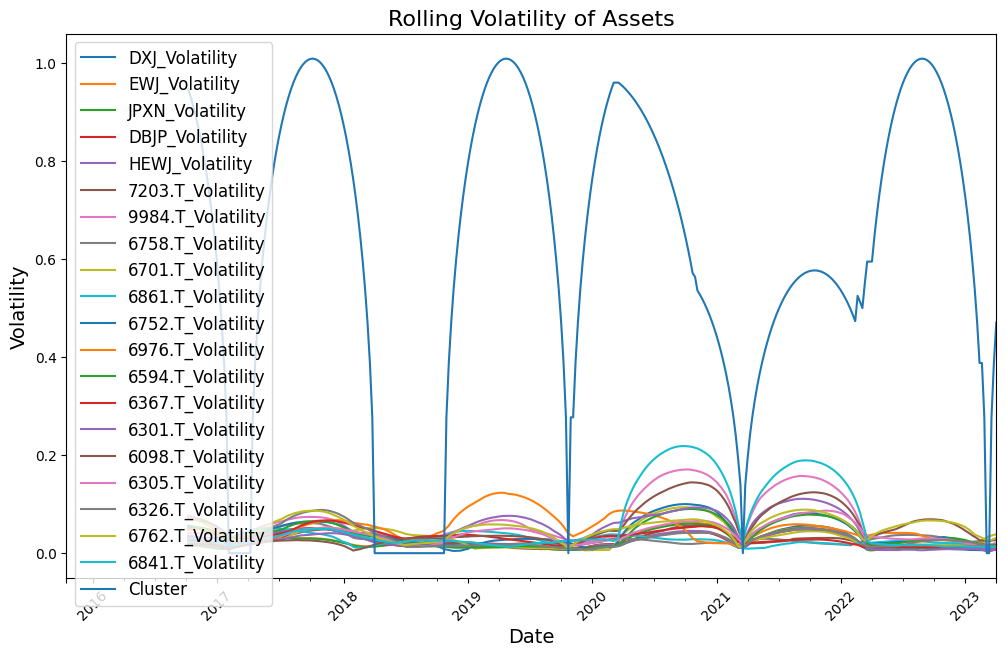

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your volatility data is in a DataFrame 'volatility_data'

# Calculate rolling volatility
rolling_window = 52  # Set the rolling window size (e.g., 52 weeks)
rolling_volatility = weekly_price_data_rolling_volatility.rolling(rolling_window).std()

# Create a rolling plot for all assets
fig, ax = plt.subplots(figsize=(12, 8))
for col in rolling_volatility.columns:
    rolling_volatility[col].plot(ax=ax, label=col)

ax.set_title('Rolling Volatility of Assets', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Volatility', fontsize=14)
ax.legend(loc='best', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(bottom=0.2)

plt.show()
